# File Analysis `WLC_COMPOSITE_1.DLIS `

In [1]:
import os
import pandas as pd
import numpy as np
import dlisio
dlisio.set_encodings(['latin1'])
import matplotlib.pyplot as plt
import seaborn as sns
import script as sc

# Ensure that we can see pandas tables of up to 500 rows
pd.set_option('display.max_rows', 1000)

In [2]:
file = r"F:/PetroleumData/15_9-F-10/WLC_COMPOSITE_1.DLIS"

In [3]:
f, *f_tail = dlisio.load(file)
origin, *origin_tail = f.origins

In [4]:
f.describe()

------------
Logical File
------------
Description : logicalfile(COMPOSITE.logdata)
Frames      : 1
Channels    : 13

Known objects
--
FILE-HEADER : 1
ORIGIN      : 1
PARAMETER   : 21
CHANNEL     : 13
FRAME       : 1


In [5]:
origin.describe()

------
Origin
------
name   : 0
origin : 0
copy   : 0

Logical file ID          : COMPOSITE.logdata
File set name and number : PETROLOG-TO-DLIS / 316946557
File number and type     : 1 / PETROLOG-FILE

Field                   : Volve
Well (id/name)          :  / 15/9-F-10
Produced by (code/name) : 126 / CROCKER DATA PROCESSING
Produced for            : StatoilHydro
Created                 : 2010-01-18 08:42:37.862000

Created by              : PETROLOG, (version: Version 10.5)
Other programs/services : PETROLOG-TO-DLIS


In [6]:
parameter_table = sc.summarize(f.parameters, name='Name', long_name='Long name', values='Value(s)')
parameter_table.sort_values('Name')

,Name,Long name,Value(s)
13,APD,Above Perm. Datum,[609999936.0]
0,CN,Company,[StatoilHydro]
4,COUN,County or Rig name,[Maersk Inspirer]
15,DMF,Drill measured from,[DF]
10,EDF,Elevation DF (wrt EPD),[54.900001525878906]
11,EGL,Elevation GL (wrt EPD),[-91.0]
12,ELZ,Elev. Log Zero (wrt EPD),[54.900001525878906]
9,EPD,Elevation Perm. Datum,[0.0]
5,FL,Field Location,[Norwegian North Sea]
2,FN,Field,[Volve]


In [7]:
for frame in f.frames:
    index_channel = next(ch for ch in frame.channels if ch.name == frame.index)
    print(f'Frame {frame.name}:')
    print(f'Description      : {frame.description}')
    print(f'Indexed by       : {frame.index_type}')
    print(f'Interval         : [{frame.index_min}, {frame.index_max}] {index_channel.units}')
    print(f'Direction        : {frame.direction}')
    print(f'Constant spacing : {frame.spacing} {index_channel.units}')
    print(f'Index channel    : {index_channel}')
    print(f'No. of channels  : {len(frame.channels)}')
    print()

Frame 0:
Description      : None
Indexed by       : BOREHOLE-DEPTH
Interval         : [None, None] 0.1 in
Direction        : None
Constant spacing : 60 0.1 in
Index channel    : Channel(DEPT)
No. of channels  : 13



In [8]:
channel_table = sc.summarize(f.channels, name='Name', long_name='Long name', units='Units',
                                      dimension='Dimension', frame='Frame')
channel_table

,Name,Long name,Units,Dimension,Frame
0,DEPT,,0.1 in,[1],Frame(0)
1,GR,Gamma Ray,GAPI,[1],Frame(0)
2,CALI,Caliper,IN,[1],Frame(0)
3,RDEP,Deep Resistivity,OHMM,[1],Frame(0)
4,RMED,Medium Resistivity,OHMM,[1],Frame(0)
5,DEN,Bulk Density,G/CC,[1],Frame(0)
6,DENC,Bulk Density Correction,G/CC,[1],Frame(0)
7,PEF,Photoelectric Factor,B/E,[1],Frame(0)
8,NEU,Neutron Porosity,V/V,[1],Frame(0)
9,AC,Delta-T Compressional,US/F,[1],Frame(0)


In [9]:
file = r"F:/PetroleumData/15_9-F-10/WLC_COMPOSITE_1.DLIS"

In [10]:
curves_L = []
curves_name = []
longs = []
unit = []
files_L = []
files_num = []
frames = []
frames_num = []
with dlisio.load(file) as file:
    for d in file:
        files_L.append(d)
        for fram in d.frames:
            frames.append(fram)
            for channel in d.channels:
                curves_name.append(channel.name)
                longs.append(channel.long_name)
                unit.append(channel.units)
                files_num.append(len(files_L))
                frames_num.append(len(frames))
                curves = channel.curves()
                curves_L.append(curves)

In [11]:
curve_index = pd.DataFrame(
{'Curve': curves_name,
'Long': longs,
'Unit': unit,
'Internal_File': files_num,
'Frame_Number': frames_num
})

In [12]:
curve_df = pd.DataFrame()
name_index = 0
for c in curves_L:
    name = curves_name[name_index]
    np.vstack(c)
    try:
        num_col = c.shape[1]
        col_name = [name] * num_col
        df = pd.DataFrame(data=c, columns=col_name)
        name_index = name_index + 1
        df = sc.df_column_uniquify(df)
        curve_df = pd.concat([curve_df, df], axis=1)
    except:
        num_col = 0
        df = pd.DataFrame(data=c, columns=[name])
        name_index = name_index + 1
        curve_df = pd.concat([curve_df, df], axis=1)
        continue

In [13]:
curve_df

,DEPT,GR,CALI,RDEP,RMED,DEN,DENC,PEF,NEU,AC,ACS,ROP,BS
0,69240,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,6.111278,36.0
1,69300,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,6.068187,36.0
2,69360,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,6.033207,36.0
3,69420,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,5.907642,36.0
4,69480,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,5.863863,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33822,2098560,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,12.849388,8.5
33823,2098620,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000,8.5
33824,2098680,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000,8.5
33825,2098740,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000,8.5


In [14]:
curve_df["DEPT"] = curve_df["DEPT"]*0.00254       #in -> mts
curve_df = curve_df.replace(-999.25,np.nan)
curve_df["Depth"] = curve_df["DEPT"]

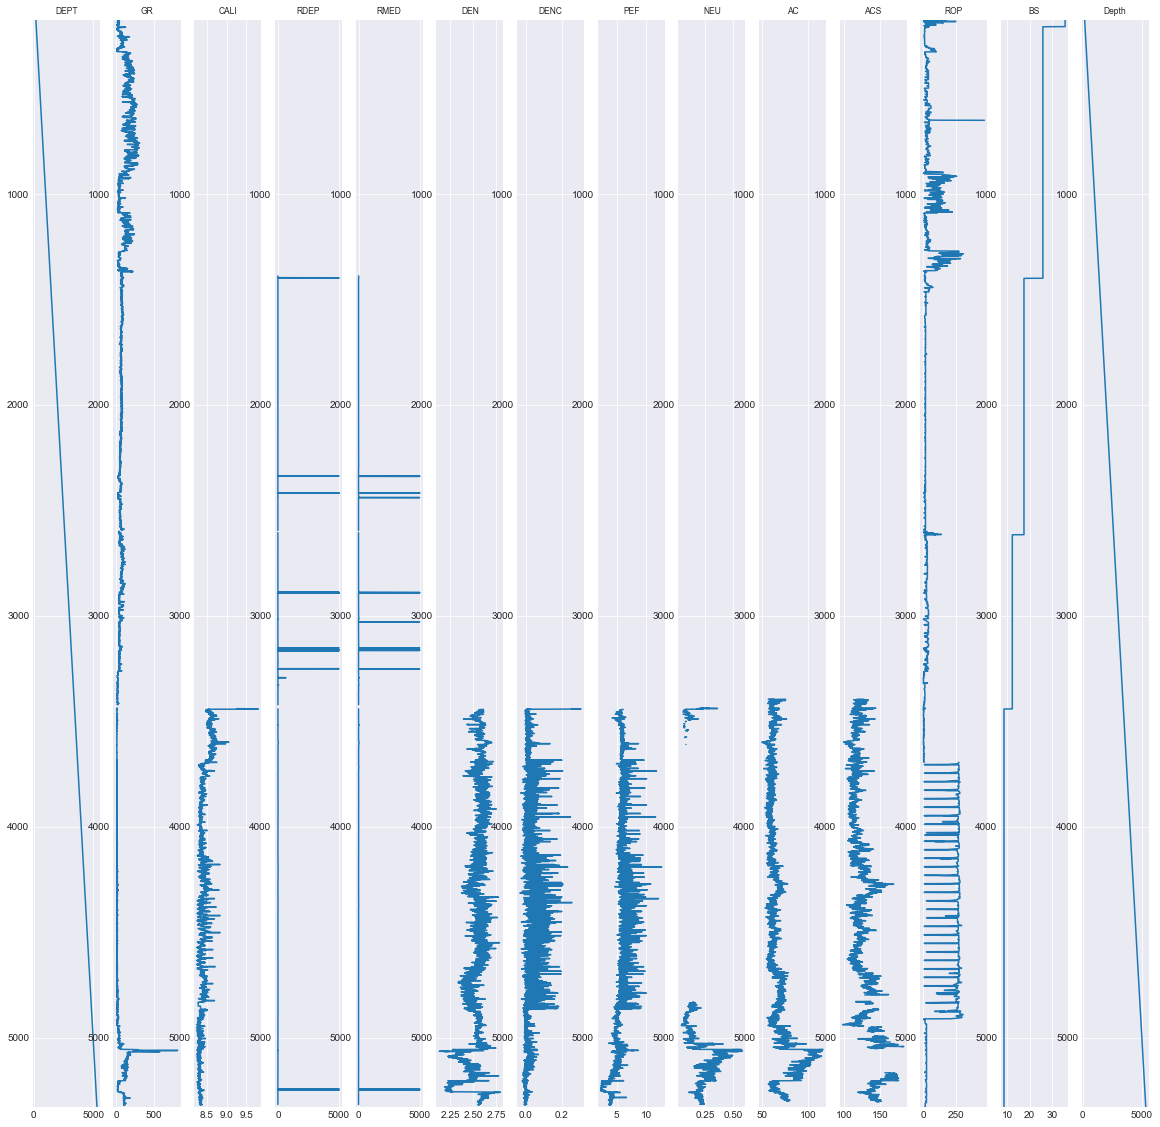

In [15]:
sc.well_plt(curve_df)

# File Analysis `WLC_PETROPHYSICAL_COMPOSITE_1.DLIS`

In [17]:
file = r"F:/PetroleumData/15_9-F-10/WLC_PETROPHYSICAL_COMPOSITE_1.DLIS"

In [18]:
f, *f_tail = dlisio.load(file)
origin, *origin_tail = f.origins

In [20]:
f.describe()

------------
Logical File
------------
Description : logicalfile(FILE01.logdata)
Frames      : 1
Channels    : 53

Known objects
--
FILE-HEADER : 1
ORIGIN      : 1
PARAMETER   : 21
CHANNEL     : 53
FRAME       : 1


In [19]:
origin.describe()

------
Origin
------
name   : 0
origin : 0
copy   : 0

Logical file ID          : FILE01.logdata
File set name and number : PETROLOG-TO-DLIS / 316946821
File number and type     : 1 / PETROLOG-FILE

Field                   : Volve
Well (id/name)          :  / 15/9-F-10
Produced by (code/name) : 126 / CROCKER DATA PROCESSING
Produced for            : StatoilHydro
Created                 : 2010-01-18 08:47:01.670000

Created by              : PETROLOG, (version: Version 10.5)
Other programs/services : PETROLOG-TO-DLIS


In [21]:
for frame in f.frames:
    index_channel = next(ch for ch in frame.channels if ch.name == frame.index)
    print(f'Frame {frame.name}:')
    print(f'Description      : {frame.description}')
    print(f'Indexed by       : {frame.index_type}')
    print(f'Interval         : [{frame.index_min}, {frame.index_max}] {index_channel.units}')
    print(f'Direction        : {frame.direction}')
    print(f'Constant spacing : {frame.spacing} {index_channel.units}')
    print(f'Index channel    : {index_channel}')
    print(f'No. of channels  : {len(frame.channels)}')
    print()

Frame 0:
Description      : None
Indexed by       : BOREHOLE-DEPTH
Interval         : [None, None] 0.1 in
Direction        : None
Constant spacing : 60 0.1 in
Index channel    : Channel(DEPT)
No. of channels  : 53



In [22]:
channel_table = sc.summarize(f.channels, name='Name', long_name='Long name', units='Units',
                                      dimension='Dimension', frame='Frame')
channel_table

,Name,Long name,Units,Dimension,Frame
0,DEPT,,0.1 in,[1],Frame(0)
1,A28H,ARC Attenuation Resistivity 28-in. at 2 MHz,OHMM,[1],Frame(0)
2,A34H,ARC Attenuation Resistivity 34-in. at 2 MHz,OHMM,[1],Frame(0)
3,A40H,ARC Attenuation Resistivity 40-in. at 2 MHz,OHMM,[1],Frame(0)
4,ATMP,ARC Annular Temperature,DEGC,[1],Frame(0)
5,BPHI,"Best Thermal Neutron Porosity, Average",V/V,[1],Frame(0)
6,CHRP,"Label Peak Coherence, Receiver Array, Compress...",,[1],Frame(0)
7,CHTP,"Label Peak Coherence, Transmitter Array, Compr...",,[1],Frame(0)
8,CRPM,Collar Rotational Speed,C/MI,[1],Frame(0)
9,DCAV,"Density Caliper, Average",IN,[1],Frame(0)


In [23]:
file = r"F:/PetroleumData/15_9-F-10/WLC_PETROPHYSICAL_COMPOSITE_1.DLIS"

In [24]:
curves_L = []
curves_name = []
longs = []
unit = []
files_L = []
files_num = []
frames = []
frames_num = []
with dlisio.load(file) as file:
    for d in file:
        files_L.append(d)
        for fram in d.frames:
            frames.append(fram)
            for channel in d.channels:
                curves_name.append(channel.name)
                longs.append(channel.long_name)
                unit.append(channel.units)
                files_num.append(len(files_L))
                frames_num.append(len(frames))
                curves = channel.curves()
                curves_L.append(curves)

In [25]:
curve_index = pd.DataFrame(
{'Curve': curves_name,
'Long': longs,
'Unit': unit,
'Internal_File': files_num,
'Frame_Number': frames_num
})

In [26]:
curve_df = pd.DataFrame()
name_index = 0
for c in curves_L:
    name = curves_name[name_index]
    np.vstack(c)
    try:
        num_col = c.shape[1]
        col_name = [name] * num_col
        df = pd.DataFrame(data=c, columns=col_name)
        name_index = name_index + 1
        df = sc.df_column_uniquify(df)
        curve_df = pd.concat([curve_df, df], axis=1)
    except:
        num_col = 0
        df = pd.DataFrame(data=c, columns=[name])
        name_index = name_index + 1
        curve_df = pd.concat([curve_df, df], axis=1)
        continue

In [27]:
curve_df

,DEPT,A28H,A34H,A40H,ATMP,BPHI,CHRP,CHTP,CRPM,DCAV,...,ROBL,ROBR,ROBU,ROP5,TAB_ARC_RES,TNPH,UCAV,UCHO,UCVE,VPVS
0,69240,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,6.111278,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
1,69300,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,6.068187,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
2,69360,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,6.033207,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
3,69420,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,5.907642,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
4,69480,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,5.863863,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33818,2098320,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,12.878844,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
33819,2098380,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,12.878844,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
33820,2098440,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,12.878844,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
33821,2098500,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,12.878844,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25


In [28]:
curve_df["DEPT"] = curve_df["DEPT"]*0.00254       #in -> mts
curve_df = curve_df.replace(-999.25,np.nan)
curve_df["Depth"] = curve_df["DEPT"]

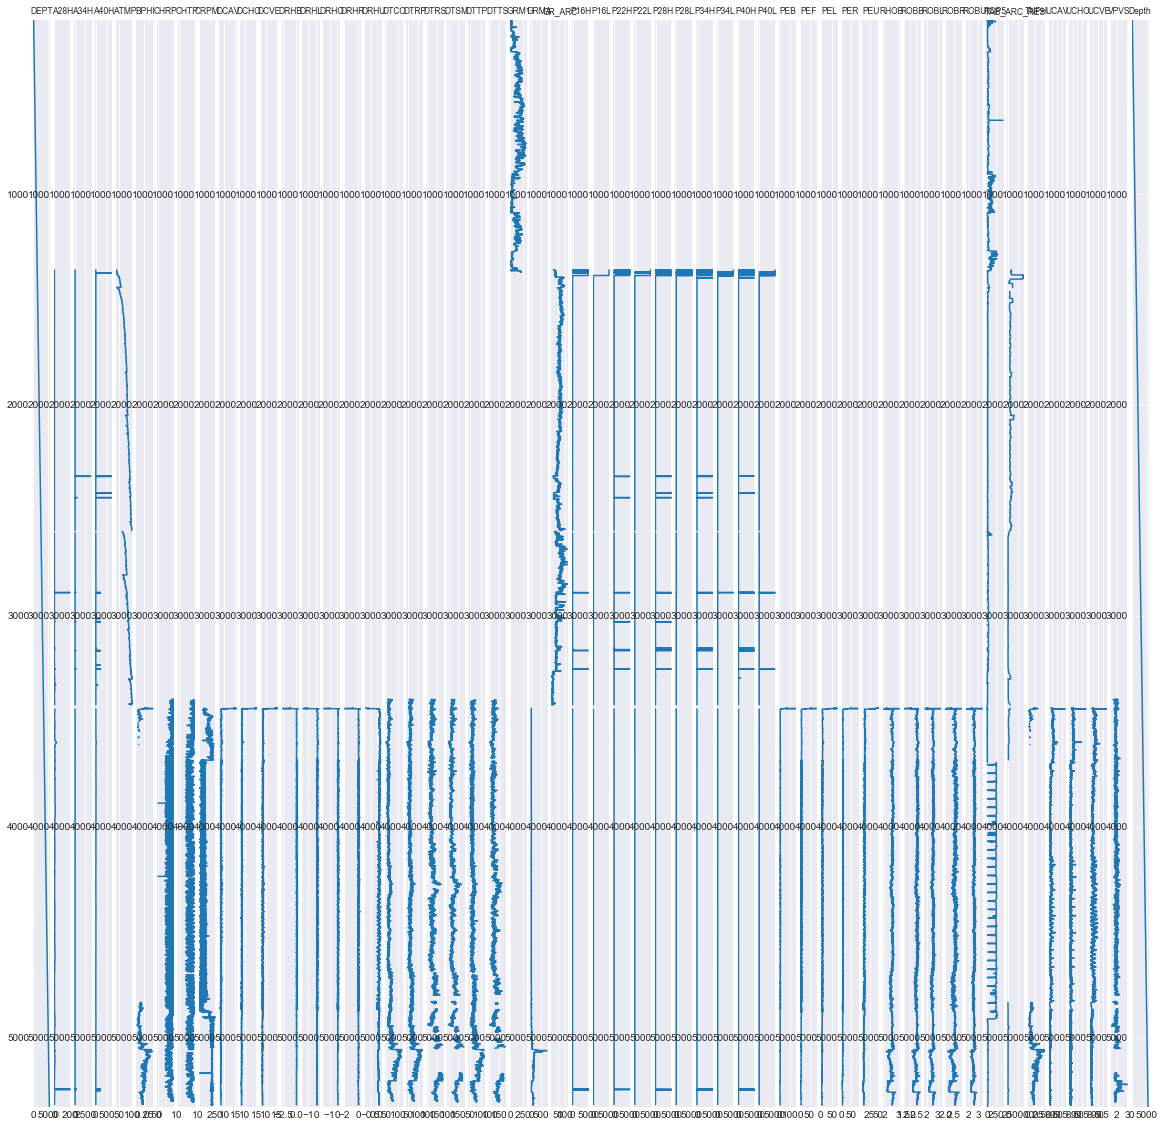

In [29]:
sc.well_plt(curve_df)